# Autoencoder

In [1]:
from conx import *
import random

Using Theano backend.


In [90]:
net = Network("Autoencoder")
net.add(Layer("input", 10, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu"))
net.add(Layer("output", 10, activation="sigmoid"))

In [91]:
net.connect()

In [92]:
net.compile(loss='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

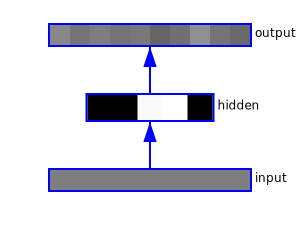

In [93]:
net

In [103]:
import time
for i in range(10):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [97]:
patterns = [one_hot(i, 10) for i in range(10)]

In [98]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [99]:
dataset = [(p,p) for p in patterns]

In [100]:
dataset[0]

([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [101]:
net.set_dataset(dataset)

10 train inputs, 0 test inputs
Set 10 inputs and targets
Input data shape: (10,), range: (0.0, 1.0), type: float32
Target data shape: (10,), range: (0.0, 1.0), type: float32


In [102]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train loss 0.48572 | train acc 0.90000 | validate% 0.00000
Epoch #  400 | train loss 0.32412 | train acc 0.90000 | validate% 0.00000
Epoch #  600 | train loss 0.26450 | train acc 0.90000 | validate% 0.00000
Epoch #  800 | train loss 0.22244 | train acc 0.91000 | validate% 0.00000
Epoch # 1000 | train loss 0.17916 | train acc 0.92000 | validate% 0.20000
Epoch # 1200 | train loss 0.13943 | train acc 0.96000 | validate% 0.20000
Epoch # 1400 | train loss 0.10838 | train acc 0.97000 | validate% 0.70000
Epoch # 1600 | train loss 0.08450 | train acc 0.97000 | validate% 0.70000
Epoch # 1800 | train loss 0.06514 | train acc 0.98000 | validate% 0.70000
Epoch # 2000 | train loss 0.04912 | train acc 1.00000 | validate% 0.80000
Epoch # 2090 | train loss 0.04305 | train acc 1.00000 | validate% 1.00000


In [88]:
net.propagate(dataset[0][0])

[0.91529089,
 0.061371062,
 1.1694119e-09,
 0.01489951,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9001043e-26,
 0.0]

In [23]:
net.reset()

In [281]:
from keras.datasets import mnist
(train_inputs, train_targets), (test_inputs, test_targets) = mnist.load_data()

In [282]:
train_inputs[0].shape

(28, 28)

In [283]:
28 * 28

784

In [319]:
net = Network("MNIST-Autoencoder")
net.add(Layer("input", 784, vshape=(28,28), minmax=(0,255)))
net.add(Layer("hidden1", 25, vshape=(5,5), activation="relu"))
net.add(Layer("hidden2", 25, vshape=(5,5), activation="relu"))
net.add(Layer("hidden3", 25, vshape=(5,5), activation="relu"))
net.add(Layer("output", 784, vshape=(28,28), activation="sigmoid"))

In [320]:
net.connect()
net.compile(loss="binary_crossentropy", optimizer="adam")

<IPython.core.display.Javascript object>

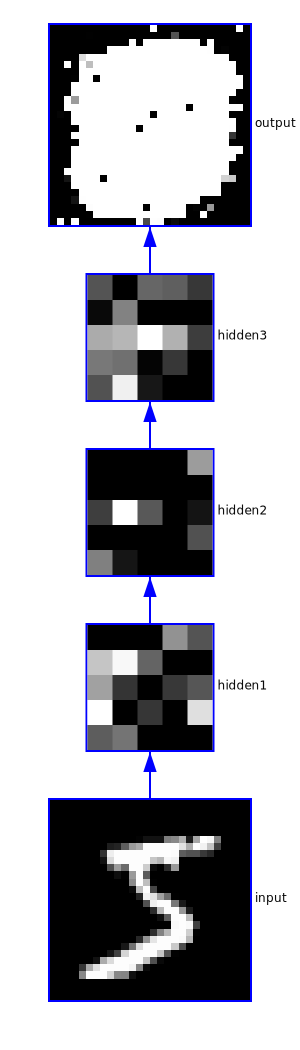

In [335]:
net

<IPython.core.display.Javascript object>

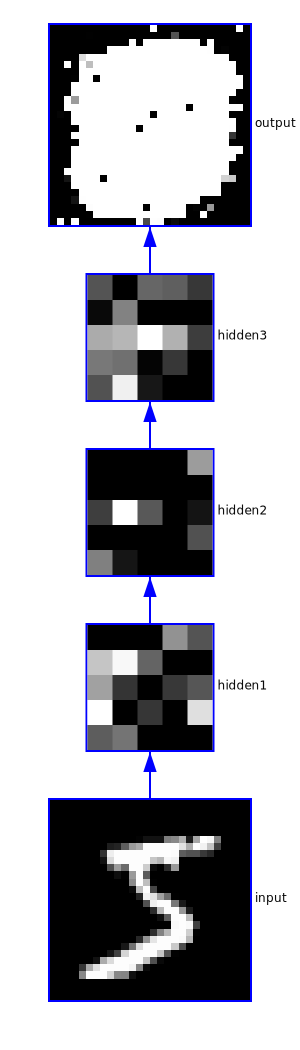

In [336]:
net

In [337]:
output = net.propagate(train_inputs[random.randint(0,1000)].reshape((784, )))

In [294]:
train_inputs = np.array([pattern.reshape((784,)) for pattern in train_inputs])

In [329]:
net.set_dataset_direct(train_inputs, train_inputs)

60000 train inputs, 0 test inputs
Set 60000 inputs and targets
Input data shape: (784,), range: (0, 255), type: uint8
Target data shape: (784,), range: (0, 255), type: uint8


In [330]:
net.split_dataset(0.10)

Split dataset into:
   6000 train inputs
   54000 test inputs


In [331]:
net.train(accuracy=0.5, epochs=1000, report_rate=1, tolerance=0.4)

Training...
Epoch #    1 | train loss -1.51523 | train acc 0.38287 | validate% 0.00000
Epoch #    2 | train loss -21.10456 | train acc 0.37622 | validate% 0.00000
Epoch #    3 | train loss -43.95176 | train acc 0.37033 | validate% 0.00000
Epoch #    4 | train loss -70.30525 | train acc 0.36482 | validate% 0.00000
Epoch #    5 | train loss -99.15157 | train acc 0.35929 | validate% 0.00000
Epoch #    6 | train loss -130.02003 | train acc 0.35347 | validate% 0.00000
Epoch #    7 | train loss -162.95244 | train acc 0.34821 | validate% 0.00000
Epoch #    8 | train loss -197.47273 | train acc 0.34270 | validate% 0.00000
Epoch #    9 | train loss -231.85010 | train acc 0.33682 | validate% 0.00000
Epoch #   10 | train loss -264.01199 | train acc 0.33067 | validate% 0.00000
Epoch #   11 | train loss -292.75897 | train acc 0.32446 | validate% 0.00000
Epoch #   12 | train loss -318.09982 | train acc 0.31983 | validate% 0.00000
Epoch #   13 | train loss -340.10260 | train acc 0.31826 | validate% 0

KeyboardInterrupt: 